## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

## Loading the Dataset

In [2]:
df = pd.read_csv('avalanche_data.csv', sep=';')

In [3]:
df.sample(10)

,no,date_release,snow_type,trigger_type,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max.danger.corr
6703,6704,2012-02-16,dry,UNKNOWN,2723.0,2440.0,51.0,584.0,55.0,1204.0,19169.0,3,1.0,4.0
1527,1528,2005-03-10,unknown,NATURAL,2672.0,2575.0,214.0,179.0,99.0,474.0,8428.0,2,0.1,4.0
3346,3347,2007-04-14,wet,NATURAL,1998.0,1920.0,153.0,124.0,23.0,279.0,2031.0,2,0.1,3.0
5394,5395,2010-03-23,wet,NATURAL,2119.0,1821.0,46.0,449.0,92.0,976.0,16245.0,3,1.0,3.0
7410,7411,2013-03-08,wet,NATURAL,1959.0,1782.0,54.0,204.0,31.0,434.0,4364.0,2,0.1,3.0
5131,5132,2010-03-20,wet,NATURAL,2217.0,2183.0,113.0,42.0,82.0,218.0,2769.0,2,0.1,3.0
6843,6844,2012-03-01,mixed,NATURAL,2533.0,2467.0,101.0,88.0,16.0,189.0,921.0,2,0.1,4.0
2578,2579,2006-03-09,unknown,NATURAL,2204.0,2109.0,313.0,183.0,97.0,467.0,13547.0,2,0.1,4.0
12371,12372,2018-04-02,dry,NATURAL,2514.0,2453.0,223.0,105.0,46.0,268.0,4076.0,2,0.1,3.0
4087,4088,2008-05-07,wet,NATURAL,2162.0,1880.0,260.0,426.0,42.0,901.0,9234.0,3,1.0,3.0


Deleting column 'date_release'

In [94]:
df = df.drop(columns=['date_release'])

In [95]:
df.head()

,no,snow_type,trigger_type,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max.danger.corr
0,1,dry,NATURAL,2476.0,2439.0,4.0,63.0,33.0,168.0,1413.0,2,0.1,NaN
1,2,dry,NATURAL,2562.0,2484.0,42.0,101.0,123.0,355.0,8762.0,2,0.1,3.0
2,3,dry,NATURAL,2494.0,2356.0,21.0,127.0,351.0,834.0,30522.0,3,1.0,3.0
3,4,dry,HUMAN,2115.0,2017.0,200.0,166.0,85.0,454.0,7837.0,2,0.1,3.0
4,5,dry,NATURAL,2085.0,1986.0,42.0,128.0,18.0,265.0,1522.0,2,0.1,3.0


Renaming the label

In [96]:
df.rename(columns={'max.danger.corr': 'max_danger_corr'}, inplace=True)

In [97]:
df.head()

,no,snow_type,trigger_type,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max_danger_corr
0,1,dry,NATURAL,2476.0,2439.0,4.0,63.0,33.0,168.0,1413.0,2,0.1,NaN
1,2,dry,NATURAL,2562.0,2484.0,42.0,101.0,123.0,355.0,8762.0,2,0.1,3.0
2,3,dry,NATURAL,2494.0,2356.0,21.0,127.0,351.0,834.0,30522.0,3,1.0,3.0
3,4,dry,HUMAN,2115.0,2017.0,200.0,166.0,85.0,454.0,7837.0,2,0.1,3.0
4,5,dry,NATURAL,2085.0,1986.0,42.0,128.0,18.0,265.0,1522.0,2,0.1,3.0


## Exploratory Data Analysis

### Info about the Dataset

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13918 entries, 0 to 13917
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   no                  13918 non-null  int64  
 1   snow_type           13918 non-null  object 
 2   trigger_type        13918 non-null  object 
 3   max_elevation_m     13896 non-null  float64
 4   min_elevation_m     13896 non-null  float64
 5   aspect_degrees      13802 non-null  float64
 6   length_m            13802 non-null  float64
 7   width_m             13802 non-null  float64
 8   perimeter_length_m  13802 non-null  float64
 9   area_m2             13802 non-null  float64
 10  aval_size_class     13918 non-null  int64  
 11  weight_AAI          13918 non-null  float64
 12  max_danger_corr     13745 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 1.4+ MB


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no,13918.0,6959.500000,4017.924858,1.00,3480.25,6959.5,10438.75,13918.0
max_elevation_m,13896.0,2371.072179,226.396689,1304.00,2201.00,2416.5,2544.00,3109.0
min_elevation_m,13896.0,2219.053253,267.029036,1212.00,2015.00,2267.0,2432.00,2876.0
aspect_degrees,13802.0,151.415012,103.429621,0.00,58.00,125.0,248.00,360.0
length_m,13802.0,249.019200,239.771267,6.00,107.00,176.0,297.00,3099.0
width_m,13802.0,78.278293,95.955318,3.00,31.00,50.0,87.00,2064.0
perimeter_length_m,13802.0,615.438632,642.722579,43.00,264.00,424.0,712.00,8823.0
area_m2,13802.0,16638.671135,44197.097563,102.00,2526.25,5624.5,13555.75,1034212.0
aval_size_class,13918.0,2.232505,0.560721,1.00,2.00,2.0,3.00,5.0
weight_AAI,13918.0,0.523119,1.473510,0.01,0.10,0.1,1.00,10.0


### Dealing with Missing Values

In [100]:
df.isnull().sum()

no                      0
snow_type               0
trigger_type            0
max_elevation_m        22
min_elevation_m        22
aspect_degrees        116
length_m              116
width_m               116
perimeter_length_m    116
area_m2               116
aval_size_class         0
weight_AAI              0
max_danger_corr       173
dtype: int64

In [101]:
df.dropna(inplace=True)

In [102]:
df.isnull().sum()

no                    0
snow_type             0
trigger_type          0
max_elevation_m       0
min_elevation_m       0
aspect_degrees        0
length_m              0
width_m               0
perimeter_length_m    0
area_m2               0
aval_size_class       0
weight_AAI            0
max_danger_corr       0
dtype: int64

### Shape of the Dataset

In [103]:
df.shape

(13608, 13)

### Studying the label 'max_danger_corr'

In [104]:
df['max_danger_corr'].value_counts()

3.0    6429
4.0    5647
2.0    1316
5.0     165
1.0      51
Name: max_danger_corr, dtype: int64

In [105]:
df.groupby('max_danger_corr').mean()

,no,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI
max_danger_corr,,,,,,,,,,
1.0,5742.117647,2349.117647,2219.803922,166.803922,200.843137,105.960784,548.000000,26230.254902,2.156863,0.590588
2.0,5920.555471,2349.443009,2188.870061,147.522036,261.343465,80.503799,645.819909,17625.875380,2.291793,0.643693
3.0,7062.832789,2380.397885,2222.145901,151.364598,259.934827,83.211541,646.734484,18597.901384,2.254005,0.566659
4.0,7012.697184,2365.047636,2217.309899,151.803081,235.966531,72.600673,578.330087,14330.279263,2.220825,0.457354
5.0,11748.460606,2441.860606,2335.969697,163.733333,170.945455,66.175758,428.103030,8695.030303,2.139394,0.274545


C:\Users\anupa\.android\trial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_danger_corr', ylabel='count'>

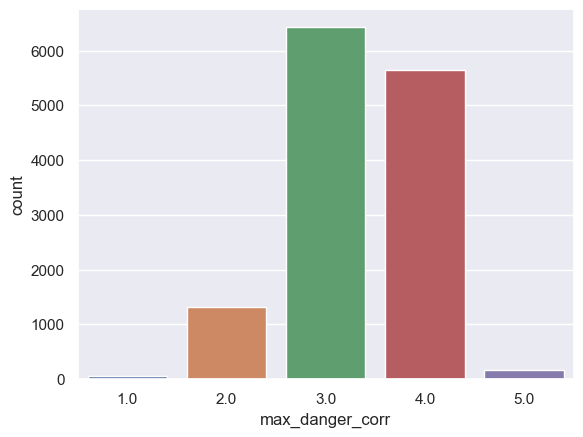

In [106]:
sns.set()
sns.countplot(df['max_danger_corr'])

In [107]:
df['max_danger_corr'].replace([1, 2], 'low_risk', inplace=True)
df['max_danger_corr'].replace([3], 'medium_risk', inplace=True)
df['max_danger_corr'].replace([4, 5], 'high_risk', inplace=True)

In [108]:
df.sample(5)

,no,snow_type,trigger_type,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max_danger_corr
2282,2283,unknown,UNKNOWN,2139.0,1545.0,328.0,876.0,91.0,1800.0,20259.0,3,1.0,medium_risk
4131,4132,unknown,NATURAL,2577.0,2442.0,23.0,167.0,18.0,358.0,2143.0,2,0.1,medium_risk
3082,3083,mixed,UNKNOWN,2194.0,1871.0,69.0,401.0,48.0,864.0,11640.0,3,1.0,high_risk
6052,6053,wet,NATURAL,2126.0,1818.0,40.0,421.0,74.0,895.0,8069.0,3,1.0,high_risk
4227,4228,unknown,HUMAN,2521.0,2469.0,62.0,67.0,18.0,149.0,871.0,2,0.1,medium_risk


In [109]:
df['max_danger_corr'].value_counts()

medium_risk    6429
high_risk      5812
low_risk       1367
Name: max_danger_corr, dtype: int64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_danger_corr', ylabel='count'>

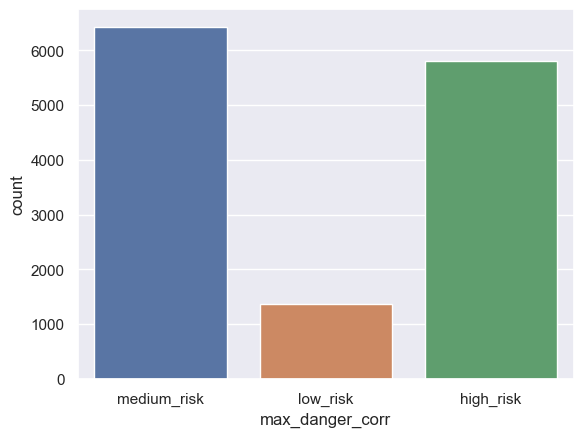

In [110]:
sns.countplot(df['max_danger_corr'])

### Label Encoding the Labels

In [111]:
label_encoder = LabelEncoder()
df['max_danger_corr'] = label_encoder.fit_transform(df['max_danger_corr'])

In [112]:
df.head()

,no,snow_type,trigger_type,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max_danger_corr
1,2,dry,NATURAL,2562.0,2484.0,42.0,101.0,123.0,355.0,8762.0,2,0.1,2
2,3,dry,NATURAL,2494.0,2356.0,21.0,127.0,351.0,834.0,30522.0,3,1.0,2
3,4,dry,HUMAN,2115.0,2017.0,200.0,166.0,85.0,454.0,7837.0,2,0.1,2
4,5,dry,NATURAL,2085.0,1986.0,42.0,128.0,18.0,265.0,1522.0,2,0.1,2
5,6,dry,NATURAL,2605.0,2529.0,240.0,127.0,63.0,324.0,5929.0,2,0.1,2


In [113]:
df.iloc[11832, :]

no                        12135
snow_type                   dry
trigger_type          EXPLOSIVE
max_elevation_m          2683.0
min_elevation_m          2493.0
aspect_degrees            230.0
length_m                  333.0
width_m                    55.0
perimeter_length_m        714.0
area_m2                 11017.0
aval_size_class               3
weight_AAI                  1.0
max_danger_corr               0
Name: 12134, dtype: object

In [114]:
df['max_danger_corr'].value_counts()

2    6429
0    5812
1    1367
Name: max_danger_corr, dtype: int64

### Studying 'snow_type' feature

In [115]:
df['snow_type'].value_counts()

dry        7661
wet        4027
unknown    1052
mixed       868
Name: snow_type, dtype: int64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='snow_type', ylabel='count'>

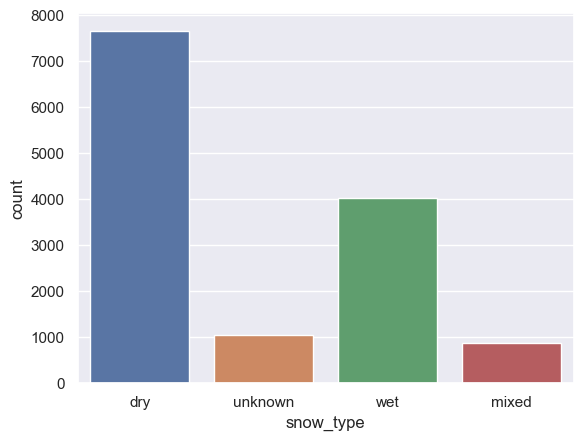

In [116]:
sns.countplot(df['snow_type'])

<AxesSubplot:xlabel='snow_type', ylabel='count'>

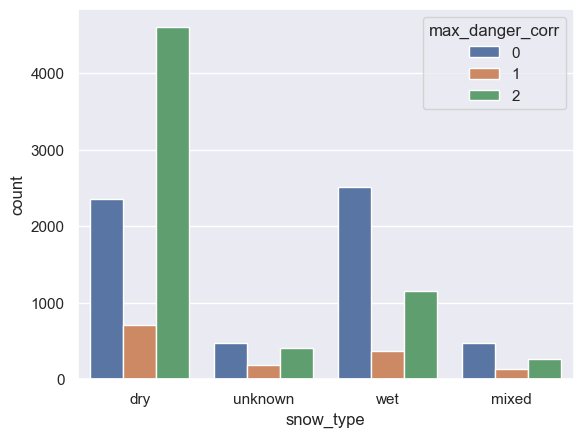

In [117]:
sns.countplot(x='snow_type', hue='max_danger_corr', data=df)

In [118]:
snow_type_encoding = pd.get_dummies(df['snow_type'], prefix='snow_type')

In [119]:
snow_type_encoding

,snow_type_dry,snow_type_mixed,snow_type_unknown,snow_type_wet
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
...,...,...,...,...
13912,0,0,0,1
13913,0,0,0,1
13914,0,0,0,1
13915,1,0,0,0


In [120]:
df = pd.concat([df, snow_type_encoding], axis=1)

In [121]:
df.head()

,no,snow_type,trigger_type,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max_danger_corr,snow_type_dry,snow_type_mixed,snow_type_unknown,snow_type_wet
1,2,dry,NATURAL,2562.0,2484.0,42.0,101.0,123.0,355.0,8762.0,2,0.1,2,1,0,0,0
2,3,dry,NATURAL,2494.0,2356.0,21.0,127.0,351.0,834.0,30522.0,3,1.0,2,1,0,0,0
3,4,dry,HUMAN,2115.0,2017.0,200.0,166.0,85.0,454.0,7837.0,2,0.1,2,1,0,0,0
4,5,dry,NATURAL,2085.0,1986.0,42.0,128.0,18.0,265.0,1522.0,2,0.1,2,1,0,0,0
5,6,dry,NATURAL,2605.0,2529.0,240.0,127.0,63.0,324.0,5929.0,2,0.1,2,1,0,0,0


In [122]:
df.drop(columns=['snow_type'], inplace=True)

### Studying feature 'trigger_type'

In [123]:
df['trigger_type'].value_counts()

NATURAL      8062
UNKNOWN      2382
EXPLOSIVE    1970
HUMAN        1194
Name: trigger_type, dtype: int64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trigger_type', ylabel='count'>

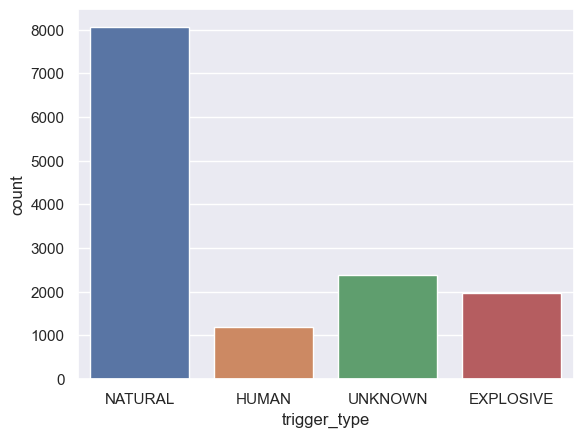

In [124]:
sns.countplot(df['trigger_type'])

<AxesSubplot:xlabel='trigger_type', ylabel='count'>

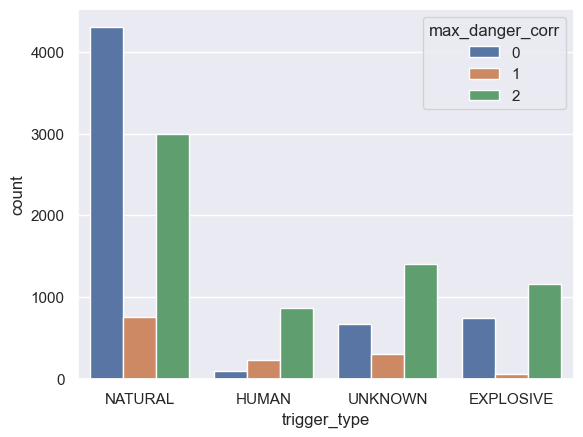

In [125]:
sns.countplot(x='trigger_type', hue='max_danger_corr', data=df)

In [126]:
trigger_type_encoding = pd.get_dummies(df['trigger_type'], prefix='trigger_type')

In [127]:
trigger_type_encoding

,trigger_type_EXPLOSIVE,trigger_type_HUMAN,trigger_type_NATURAL,trigger_type_UNKNOWN
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
5,0,0,1,0
...,...,...,...,...
13912,0,0,1,0
13913,0,0,1,0
13914,0,0,1,0
13915,0,1,0,0


In [128]:
df = pd.concat([df, trigger_type_encoding], axis=1)

In [131]:
df.drop(columns=['trigger_type'], inplace=True)

In [132]:
df.head()

,no,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max_danger_corr,snow_type_dry,snow_type_mixed,snow_type_unknown,snow_type_wet,trigger_type_EXPLOSIVE,trigger_type_HUMAN,trigger_type_NATURAL,trigger_type_UNKNOWN
1,2,2562.0,2484.0,42.0,101.0,123.0,355.0,8762.0,2,0.1,2,1,0,0,0,0,0,1,0
2,3,2494.0,2356.0,21.0,127.0,351.0,834.0,30522.0,3,1.0,2,1,0,0,0,0,0,1,0
3,4,2115.0,2017.0,200.0,166.0,85.0,454.0,7837.0,2,0.1,2,1,0,0,0,0,1,0,0
4,5,2085.0,1986.0,42.0,128.0,18.0,265.0,1522.0,2,0.1,2,1,0,0,0,0,0,1,0
5,6,2605.0,2529.0,240.0,127.0,63.0,324.0,5929.0,2,0.1,2,1,0,0,0,0,0,1,0


### Avoding Dummy Variable Trap

In [133]:
df.drop(columns=['snow_type_mixed', 'trigger_type_HUMAN'], inplace=True)

In [134]:
df.head()

,no,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max_danger_corr,snow_type_dry,snow_type_unknown,snow_type_wet,trigger_type_EXPLOSIVE,trigger_type_NATURAL,trigger_type_UNKNOWN
1,2,2562.0,2484.0,42.0,101.0,123.0,355.0,8762.0,2,0.1,2,1,0,0,0,1,0
2,3,2494.0,2356.0,21.0,127.0,351.0,834.0,30522.0,3,1.0,2,1,0,0,0,1,0
3,4,2115.0,2017.0,200.0,166.0,85.0,454.0,7837.0,2,0.1,2,1,0,0,0,0,0
4,5,2085.0,1986.0,42.0,128.0,18.0,265.0,1522.0,2,0.1,2,1,0,0,0,1,0
5,6,2605.0,2529.0,240.0,127.0,63.0,324.0,5929.0,2,0.1,2,1,0,0,0,1,0


The feature 'no' is basically an index, and is of no use building the model. I am gonna drop it.

In [135]:
df.drop(columns=['no'], inplace=True)

### Checking out new shape of the dataset

In [136]:
df.shape

(13608, 16)

### Studying the feature 'aval_size_class'

In [137]:
df['aval_size_class'].value_counts()

2    9633
3    3180
1     495
4     290
5      10
Name: aval_size_class, dtype: int64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_size_class', ylabel='count'>

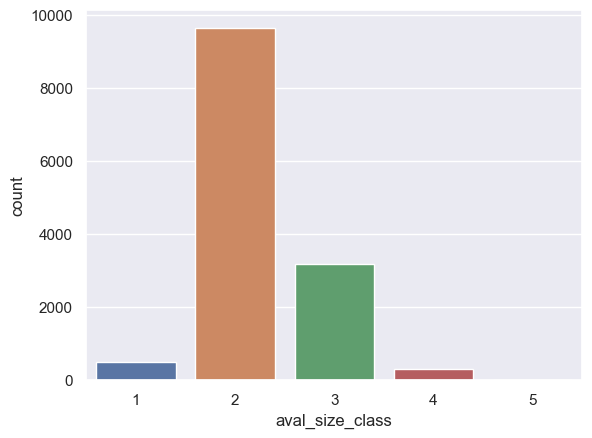

In [138]:
sns.countplot(df['aval_size_class'])

<AxesSubplot:xlabel='aval_size_class', ylabel='count'>

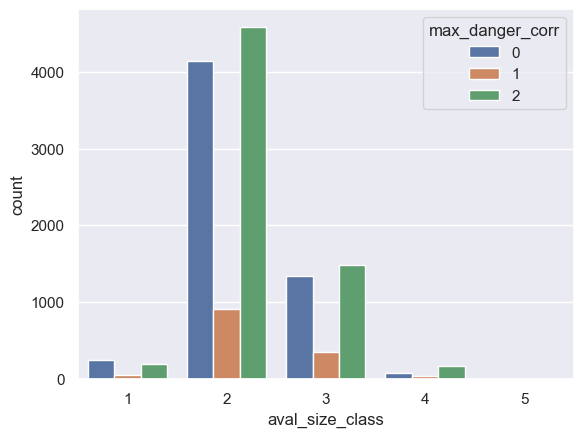

In [140]:
sns.countplot(x='aval_size_class', hue='max_danger_corr', data=df)

This feature is already label encoded, and since it is an ordinal feature, there is no need for one-hot encoding.

### Studying the feature 'weight_AAI'

In [142]:
df['weight_AAI'].value_counts()

0.10     9633
1.00     3180
0.01      495
10.00     300
Name: weight_AAI, dtype: int64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight_AAI', ylabel='count'>

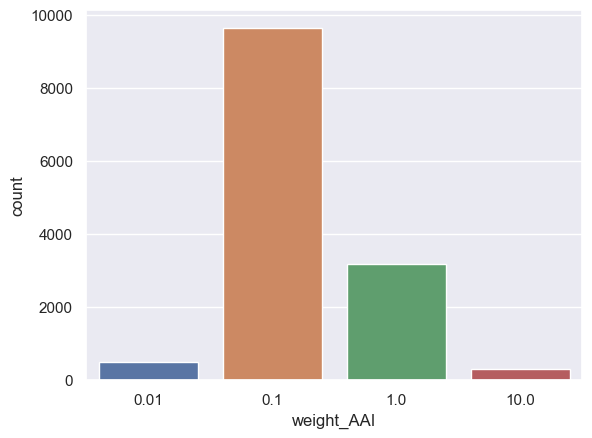

In [143]:
sns.countplot(df['weight_AAI'])

<AxesSubplot:xlabel='weight_AAI', ylabel='count'>

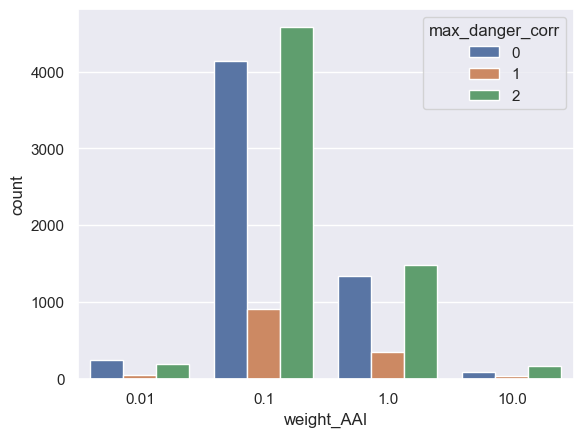

In [144]:
sns.countplot(x='weight_AAI', hue='max_danger_corr', data=df)

In [145]:
mapping = {0.01: 1, 0.1: 2, 1: 3, 10: 4}
df['weight_AAI'] = df['weight_AAI'].map(mapping)

In [146]:
df.head()

,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max_danger_corr,snow_type_dry,snow_type_unknown,snow_type_wet,trigger_type_EXPLOSIVE,trigger_type_NATURAL,trigger_type_UNKNOWN
1,2562.0,2484.0,42.0,101.0,123.0,355.0,8762.0,2,2,2,1,0,0,0,1,0
2,2494.0,2356.0,21.0,127.0,351.0,834.0,30522.0,3,3,2,1,0,0,0,1,0
3,2115.0,2017.0,200.0,166.0,85.0,454.0,7837.0,2,2,2,1,0,0,0,0,0
4,2085.0,1986.0,42.0,128.0,18.0,265.0,1522.0,2,2,2,1,0,0,0,1,0
5,2605.0,2529.0,240.0,127.0,63.0,324.0,5929.0,2,2,2,1,0,0,0,1,0


This feature is ordinal in nature, so there is no need to express it in one-hot encoding.

## Renaming some features before exporting the cleaned dataset

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13608 entries, 1 to 13916
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   max_elevation_m         13608 non-null  float64
 1   min_elevation_m         13608 non-null  float64
 2   aspect_degrees          13608 non-null  float64
 3   length_m                13608 non-null  float64
 4   width_m                 13608 non-null  float64
 5   perimeter_length_m      13608 non-null  float64
 6   area_m2                 13608 non-null  float64
 7   aval_size_class         13608 non-null  int64  
 8   weight_AAI              13608 non-null  float64
 9   max_danger_corr         13608 non-null  int32  
 10  snow_type_dry           13608 non-null  uint8  
 11  snow_type_unknown       13608 non-null  uint8  
 12  snow_type_wet           13608 non-null  uint8  
 13  trigger_type_EXPLOSIVE  13608 non-null  uint8  
 14  trigger_type_NATURAL    13608 non-null

In [147]:
df.rename(columns={
                  'max_elevation_m': 'max_elevation',
                  'min_elevation_m': 'min_elevation',
                  'length_m': 'length',
                  'width_m': 'width',
                  'perimeter_length_m': 'perimeter',
                  'area_m2': 'area',
                  'max_danger_corr': 'risk_index',
                  'trigger_type_EXPLOSIVE': 'trigger_type_explosive',
                  'trigger_type_NATURAL': 'trigger_type_natural',
                  'trigger_type_UNKNOWN': 'trigger_type_unknown'
                  }, inplace=True)

In [148]:
df.head()

,max_elevation,min_elevation,aspect_degrees,length,width,perimeter,area,aval_size_class,weight_AAI,risk_index,snow_type_dry,snow_type_unknown,snow_type_wet,trigger_type_explosive,trigger_type_natural,trigger_type_unknown
1,2562.0,2484.0,42.0,101.0,123.0,355.0,8762.0,2,2,2,1,0,0,0,1,0
2,2494.0,2356.0,21.0,127.0,351.0,834.0,30522.0,3,3,2,1,0,0,0,1,0
3,2115.0,2017.0,200.0,166.0,85.0,454.0,7837.0,2,2,2,1,0,0,0,0,0
4,2085.0,1986.0,42.0,128.0,18.0,265.0,1522.0,2,2,2,1,0,0,0,1,0
5,2605.0,2529.0,240.0,127.0,63.0,324.0,5929.0,2,2,2,1,0,0,0,1,0


In [149]:
df.shape

(13608, 16)

## Rearranging the columns of the dataframe

In [150]:
column_order = ['snow_type_dry', 'snow_type_unknown', 'snow_type_wet', 'trigger_type_explosive', 'trigger_type_natural',
               'trigger_type_unknown', 'max_elevation', 'min_elevation', 'aspect_degrees', 'length', 'width', 'perimeter',
               'area', 'aval_size_class', 'weight_AAI', 'risk_index']
df = df[column_order]

In [151]:
df.head()

,snow_type_dry,snow_type_unknown,snow_type_wet,trigger_type_explosive,trigger_type_natural,trigger_type_unknown,max_elevation,min_elevation,aspect_degrees,length,width,perimeter,area,aval_size_class,weight_AAI,risk_index
1,1,0,0,0,1,0,2562.0,2484.0,42.0,101.0,123.0,355.0,8762.0,2,2,2
2,1,0,0,0,1,0,2494.0,2356.0,21.0,127.0,351.0,834.0,30522.0,3,3,2
3,1,0,0,0,0,0,2115.0,2017.0,200.0,166.0,85.0,454.0,7837.0,2,2,2
4,1,0,0,0,1,0,2085.0,1986.0,42.0,128.0,18.0,265.0,1522.0,2,2,2
5,1,0,0,0,1,0,2605.0,2529.0,240.0,127.0,63.0,324.0,5929.0,2,2,2


In [152]:
df.shape

(13608, 16)

## Exporting the Cleaned DataFrame as a .csv file

In [153]:
df.to_csv('avalanche_data_clean.csv', index=False)